In [1]:
import numpy as np
from scipy import stats
import knockadapt

import scipy.cluster.hierarchy as hierarchy

import matplotlib.pyplot as plt
import pandas as pd

# Real Experiments

In [2]:
import experiments

sample_kwargs = {'coeff_size':10, 'method':'AR1', 'a':5, 'b':1}

abs_kwargs = {'objective':'abs', 'verbose':False,
                   'sdp_verbose':False}
frobenius_kwargs = {'objective':'norm', 'norm_type':2, 'verbose':False,
                   'sdp_verbose':False}
inf_kwargs = {'objective':'norm', 'norm_type':np.inf, 'verbose':False,
                   'sdp_verbose':False}

knockoff_methods = {'abs':abs_kwargs, 'fro':frobenius_kwargs, 'inf':inf_kwargs}




out = experiments.test_proposed_methods(n = 200, 
                                      num_graphs = 5,
                                      p = 50,
                                      q = 0.25,
                                      link_method = 'average',
                                      sample_kwargs = sample_kwargs, 
                                      knockoff_methods = knockoff_methods)

Beginning trial 0, method abs, time is 0.016122817993164062
Failure:Interrupted


SolverError: Solver 'SCS' failed. Try another solver, or solve with verbose=True for more information.

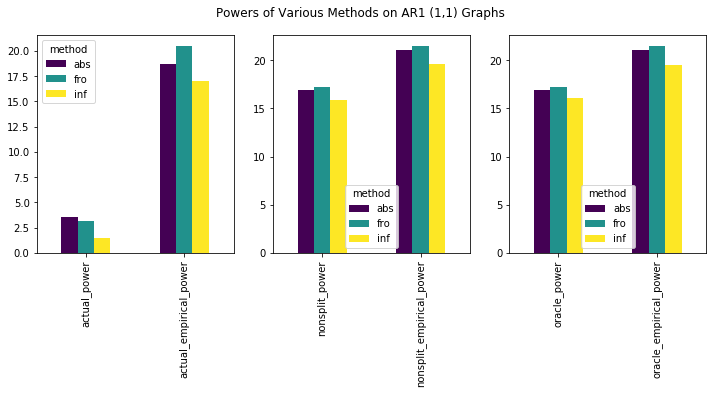

        actual_fdr  nonsplit_fdr  oracle_fdr
method                                      
abs       0.010340      0.030090    0.030090
fro       0.009312      0.022556    0.022556
inf       0.003345      0.022481    0.022162


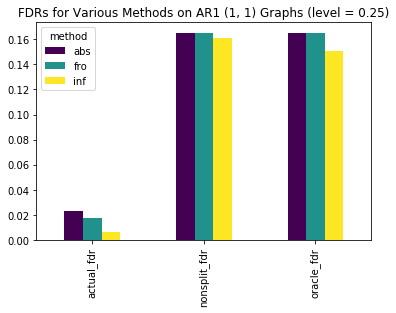

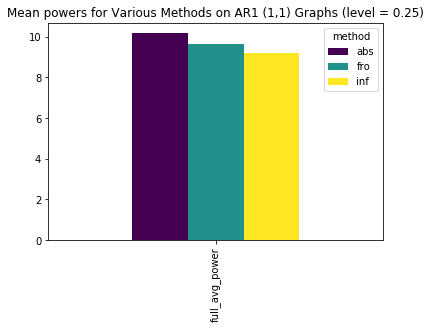

In [21]:
# Actual empirical power means what you got in the first split
out = pd.read_csv('AR1_a1_b1.csv')
data = out.rename(columns = {'methodname':'method'})


# Plot power
fig, (ax0, ax1, ax2) = plt.subplots(ncols = 3, figsize = (12, 4))
for split_method, ax in zip(['actual', 'nonsplit', 'oracle'], 
                            [ax0, ax1, ax2]):
    columns = [c for c in experiments.OUTPUT_COLUMNS if split_method in c]
    columns = [c for c in columns if 'power' in c]
    mean_performance = data.groupby(['method'])[columns].mean()
    mean_performance.transpose().plot(kind = 'bar', cmap = 'viridis', ax = ax)
fig.suptitle('Powers of Various Methods on AR1 (1,1) Graphs')
plt.show()

# Plot FDRs
fig, ax = plt.subplots(figsize = (6, 4))
columns = [c for c in experiments.OUTPUT_COLUMNS if 'fdr' in c]
mean_fdrs = data.groupby(['method'])[columns].mean()
yerr_fdrs = data.groupby(['method'])[columns].std()/np.sqrt(5)
print(yerr_fdrs)
mean_fdrs.transpose().plot(kind = 'bar', cmap = 'viridis', yerr = yerr_fdrs, ax = ax)
ax.set(title = 'FDRs for Various Methods on AR1 (1, 1) Graphs (level = 0.25)')
plt.show()

# Plot mean powers
fig, ax = plt.subplots(figsize = (6, 4))
columns = ['full_avg_power']
mean_fdrs = data.groupby(['method'])[columns].mean()
mean_fdrs.transpose().plot(kind = 'bar', cmap = 'viridis', ax = ax)
ax.set(title = 'Mean powers for Various Methods on AR1 (1,1) Graphs (level = 0.25)')
plt.show()

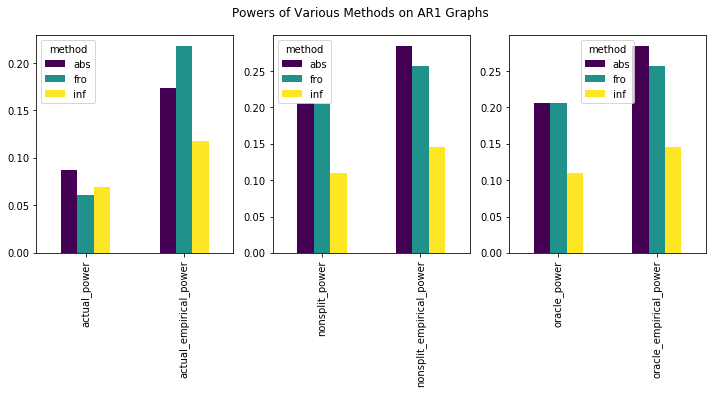

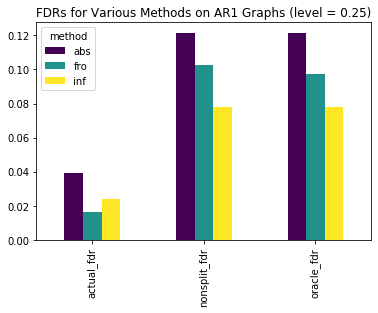

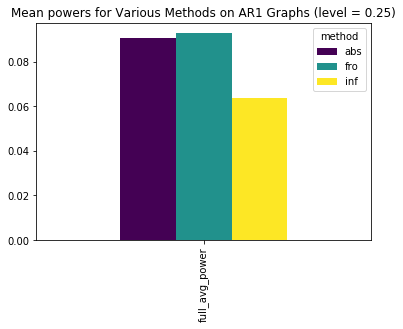

In [4]:
# Actual empirical power means what you got in the first split
data = out.rename(columns = {'methodname':'method'})


# Plot power
fig, (ax0, ax1, ax2) = plt.subplots(ncols = 3, figsize = (12, 4))
for split_method, ax in zip(['actual', 'nonsplit', 'oracle'], 
                            [ax0, ax1, ax2]):
    columns = [c for c in experiments.OUTPUT_COLUMNS if split_method in c]
    columns = [c for c in columns if 'power' in c]
    mean_performance = data.groupby(['method'])[columns].mean()
    mean_performance.transpose().plot(kind = 'bar', cmap = 'viridis', ax = ax)
fig.suptitle('Powers of Various Methods on AR1 Graphs')
plt.show()

# Plot FDRs
fig, ax = plt.subplots(figsize = (6, 4))
columns = [c for c in experiments.OUTPUT_COLUMNS if 'fdr' in c]
mean_fdrs = data.groupby(['method'])[columns].mean()
mean_fdrs.transpose().plot(kind = 'bar', cmap = 'viridis', ax = ax)
ax.set(title = 'FDRs for Various Methods on AR1 (5, 1) Graphs (level = 0.25)')
plt.show()

# Plot mean powers
fig, ax = plt.subplots(figsize = (6, 4))
columns = ['full_avg_power']
mean_fdrs = data.groupby(['method'])[columns].mean()
mean_fdrs.transpose().plot(kind = 'bar', cmap = 'viridis', ax = ax)
ax.set(title = 'Mean powers for Various Methods on AR1 (5,1) Graphs (level = 0.25)')
plt.show()

# Test FDR Control and Power

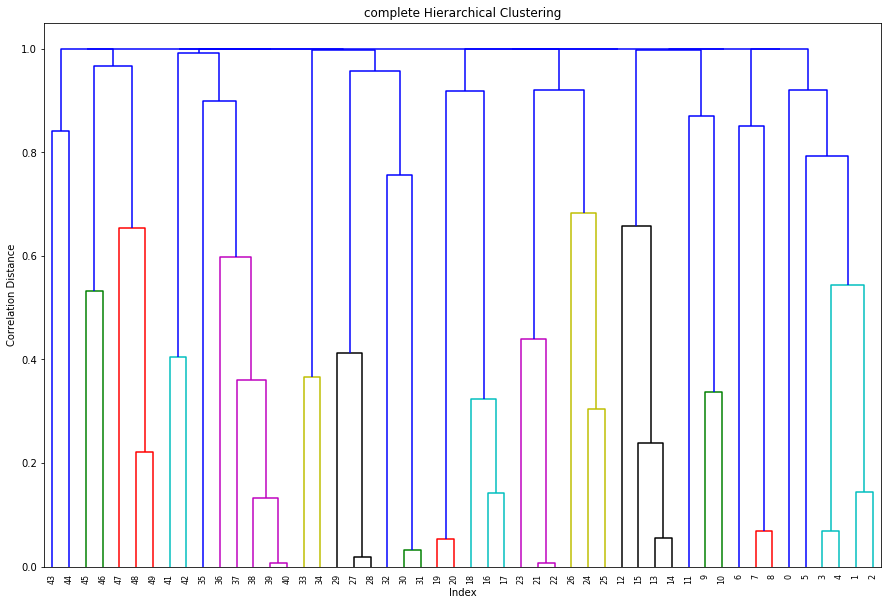

In [5]:
np.random.seed(110)
q = 0.25
n = 500
p = 50
link_method = 'complete'
coeff_size = 10
X, y, beta, Q, corr_matrix = knockadapt.graphs.sample_data(method = 'AR1', n = n, p = p,
                                                           a = 1, b = 1,
                                                          coeff_size = coeff_size)
link = knockadapt.graphs.create_correlation_tree(corr_matrix, method = link_method)
knockadapt.graphs.plot_dendrogram(link, title = link_method + ' Hierarchical Clustering')

In [6]:
groups = np.arange(0, p, 1) + 1
knockoffs, S = knockadapt.knockoffs.group_gaussian_knockoffs(
    X, corr_matrix, groups, copies = 1, return_S = True, objective = 'ccorr',
)

Solving SDP for S with p = 50
----------------------------------------------------------------------------
	SCS v2.1.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 300
eps = 1.00e-04, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 100, constraints m = 5200
Cones:	linear vars: 100
	sd vars: 5100, sd blks: 51
Setup time: 5.78e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 4.73e+20  2.67e+21  1.00e+00 -7.79e+20  1.16e+23  5.08e+23  6.70e-03 
   100| 8.02e-04  3.95e-02  1.29e-03  2.36e+01  2.36e+01  2.20e-13  8.47e-01 
   200| 7.56e-05  6.10e-03  2.07e-03  2.37e+01  2.38e+01  2.26e-13 

In [7]:
debug = False
cutoffs, hat_powers, fdps, powers, Ms = knockadapt.adaptive.select_highest_power(
    X, y, corr_matrix, link, non_nulls = beta, q = q, reduction = 10, verbose = True,
    objective = 'norm', norm_type = 'fro'
)

Solving SDP for S with p = 50
----------------------------------------------------------------------------
	SCS v2.1.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 156
eps = 1.00e-04, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 52, constraints m = 7602
Cones:	soc vars: 2501, soc blks: 1
	sd vars: 5101, sd blks: 50
Setup time: 5.02e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 5.35e+20  4.85e+21  1.00e+00 -1.03e+20  8.15e+22  2.29e+23  5.82e-03 
   100| 1.44e-04  1.14e-02  9.89e-04  7.87e+00  7.88e+00  8.17e-14  3.49e-01 
   200| 2.42e-05  1.81e-03  1.54e-04  7.87e+00  7.86e+00 

Minimum eigenvalue of V is -5.657790955484274e-05
Solving SDP for S with p = 50
----------------------------------------------------------------------------
	SCS v2.1.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 416
eps = 1.00e-04, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 104, constraints m = 7654
Cones:	soc vars: 2501, soc blks: 1
	sd vars: 5153, sd blks: 20
Setup time: 5.88e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 5.61e+20  1.92e+21  1.00e+00 -2.48e+20  2.47e+22  6.77e+22  5.55e-03 
    40| 2.92e-10  2.95e-08  3.69e-10  1.82e+00  1.82e+00  2.34e-14  1.16e-01 
------

In [8]:
plot_powers(cutoffs, hat_powers, fdps, powers, Ms)


NameError: name 'plot_powers' is not defined